In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv('data.csv')
submission = pd.read_csv('submissions.csv')

In [9]:
data.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


In [10]:
submission.head()

,id
0,0
1,1
2,2
3,3
4,4


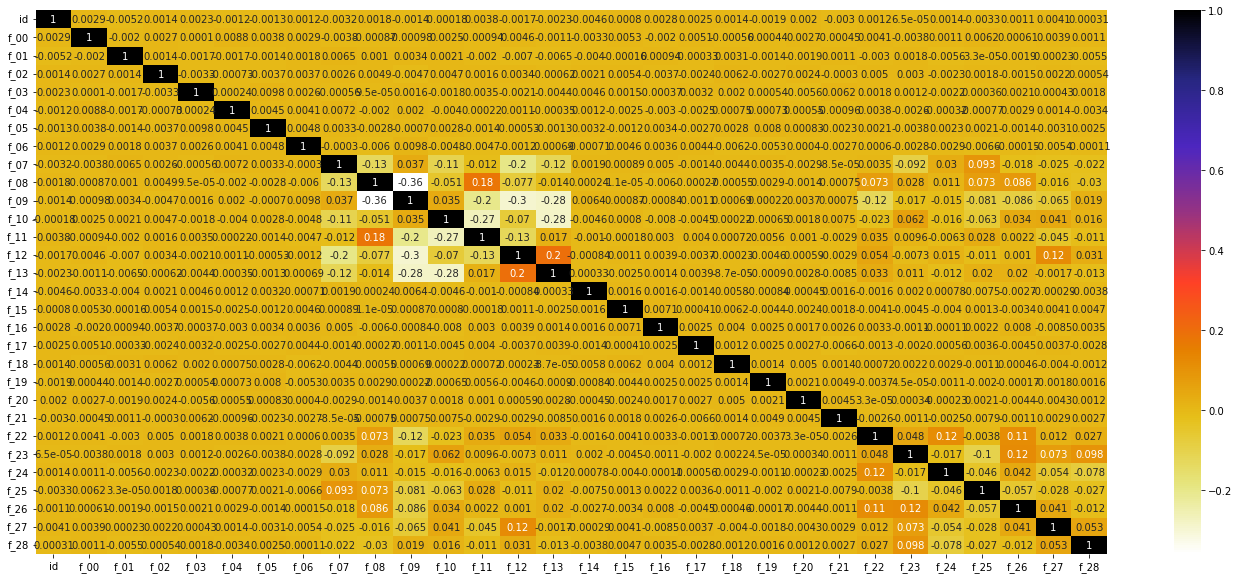

In [18]:
# Pearson Coorelation(-1 to 1)
plt.figure(figsize=(24,10))
cor = data.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [19]:
# We Will Make a function which will return the name of highly correlated features so we can drop it accordingly\

def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j] > threshold):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [22]:
corr_features = correlation(data,0.5) # We are keeping threshold 50% as high features
len(set(corr_features))

0

In [23]:
# No correlated features So the next step we try to find cluster count so that we can try clustering datapoints
# WCSS = Within Cluster Sum of Squares
# Here we are checking WCSS score for all no of clusters ranging from 1 to 30 to find the optimal no of clusters
import sklearn.cluster as cluster
K=range(1,30)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(data)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

In [24]:
mycenters = pd.DataFrame({'Clusters' : K, 'WSS' : wss})
mycenters

,Clusters,WSS
0,1,7.843268e+13
1,2,1.960820e+13
2,3,8.714765e+12
3,4,4.902121e+12
4,5,3.137690e+12
5,6,2.179185e+12
6,7,1.600960e+12
7,8,1.226172e+12
8,9,9.685026e+11
9,10,7.845468e+11


<AxesSubplot:xlabel='Clusters', ylabel='WSS'>

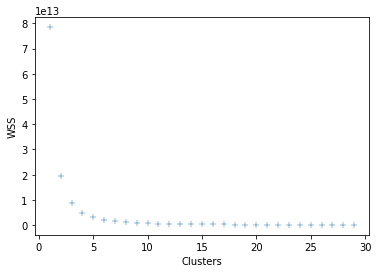

In [25]:
sns.scatterplot(x = 'Clusters', y = 'WSS', data = mycenters, marker="+")

In [ ]:
# We can see that WCSS was Significantly decreasing till 7 so we can keep 7 clusters for K means Clustering

In [26]:
## K Means Clustering

In [29]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=7)
prediction = model.fit_predict(data)

In [30]:
clusters = np.unique(prediction)
print("Clusters : ",clusters)

Clusters :  [0 1 2 3 4 5 6]


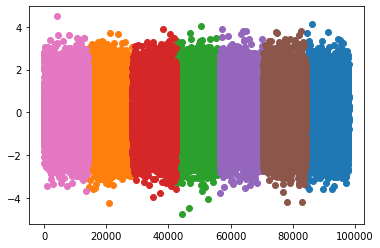

In [32]:
# Now We are plotting all the clusters together
for cluster in clusters:
    row_index = np.where(prediction==cluster)
    plt.scatter(data.values[row_index,0],data.values[row_index,1])
plt.show()

In [ ]:
# Here we Performed Clustering in dataset having nearly 29 features and got to learn below points:
# How to find Correlation and using threshold to remove highly coorelated features
# Using Elbow Method to find no of clusters
# Using K Means and plotting all the clusers together